1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# zp
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
# ks
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

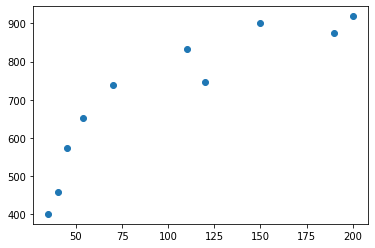

In [5]:
plt.scatter(zp,ks)
plt.show()

Расчет коэффициента линейной регрессии
С ИСПОЛЬЗОВАНИЕМ intercept
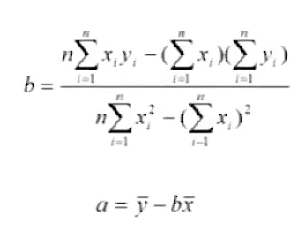

In [11]:
b = (np.mean(x*y) - np.mean(x)*np.mean(y)) / (np.mean(x**2) - (np.mean(x)**2))
b

2.620538882402765

In [12]:
a = np.mean(y) - b*np.mean(x)
a

444.1773573243596

In [14]:
# y_hat = a + b*x
y_hat = 444.18 + 2.62*x
y_hat

array([535.88, 562.08, 941.98, 968.18, 548.98, 627.58, 585.66, 837.18,
       758.58, 732.38])

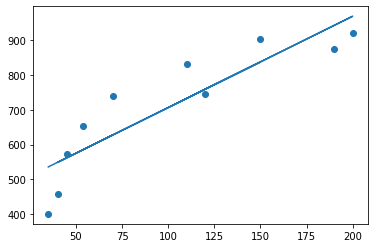

In [16]:
%matplotlib inline 
plt.scatter(x, y)
plt.plot(x, 444.18 + 2.62*x)
plt.show()

In [17]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

без использования intercept
матричным методом
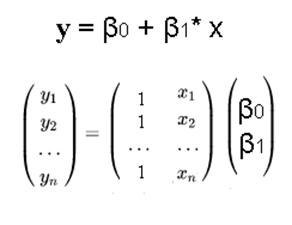

In [29]:
X = x.reshape((len(X),1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [28]:
Y = y.reshape((len(Y),1))
Y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [30]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([5.88982042])

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [41]:
def mse_ (B1, y=y, x=x, n=10):
    return np.sum((B1*x-y)**2)/n

In [33]:
alpha = 1e-6
alpha

1e-06

In [38]:
B1 = 0.1

In [39]:
n = 10

In [40]:
for i in range (10):
    B1 -= alpha*(2/n)*np.sum((B1*x-y)*X)
    print('B1={}'.format(B1))

B1=1.51911328
B1=2.646401240391424
B1=3.541874606438324
B1=4.253203545870032
B1=4.818255371260155
B1=5.267110391318513
B1=5.623663224136087
B1=5.9068948176553215
B1=6.131882892868536
B1=6.310604600285364


In [43]:
for i in range (100):
    B1 -= alpha * (2/n)*np.sum((B1*x-y)*x)
    if i%10==0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration: 0, B1=5.9148532766095725, mse=56525.491438118894
Iteration: 10, B1=5.90875121828146, mse=56521.795606377615
Iteration: 20, B1=5.904136609692617, mse=56519.68197512508
Iteration: 30, B1=5.900646867169159, mse=56518.47319794464
Iteration: 40, B1=5.898007791146662, mse=56517.781903155046
Iteration: 50, B1=5.896012021485805, mse=56517.38655445566
Iteration: 60, B1=5.894502744562653, mse=56517.16045613055
Iteration: 70, B1=5.893361371950656, mse=56517.03115141118
Iteration: 80, B1=5.8924982225713505, mse=56516.95720256418
Iteration: 90, B1=5.8918454761823424, mse=56516.91491151712


3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

таблица значений функции Лапласа используется в тех случаях, когда известна дисперсия (и сигма) генеральной совокупности.
таблица критических точек распределения Стьюдента используется, когда дисперсия (и сигма не известны). 